# Imports

In [87]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping

# Load Data

In [2]:
# get data files
#!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
#!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv


In [3]:
# !mkdir data
# !mv train-data.tsv valid-data.tsv data

In [4]:
train_file_path = "data/train-data.tsv"
test_file_path = "data/valid-data.tsv"

In [6]:
train_data = pd.read_csv(train_file_path, 
                         sep="\t", 
                         header=None, 
                         names=["type", "message"])

test_data = pd.read_csv(test_file_path, 
                        sep="\t", 
                        header=None, 
                        names = ["type", "message"])

In [7]:
train_data

,type,message
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...
...,...,...
4174,ham,just woke up. yeesh its late. but i didn't fal...
4175,ham,what do u reckon as need 2 arrange transport i...
4176,spam,free entry into our £250 weekly competition ju...
4177,spam,-pls stop bootydelious (32/f) is inviting you ...


In [8]:
test_data

,type,message
0,ham,i am in hospital da. . i will return home in e...
1,ham,"not much, just some textin'. how bout you?"
2,ham,i probably won't eat at all today. i think i'm...
3,ham,don‘t give a flying monkeys wot they think and...
4,ham,who are you seeing?
...,...,...
1387,ham,true dear..i sat to pray evening and felt so.s...
1388,ham,"what will we do in the shower, baby?"
1389,ham,where are you ? what are you doing ? are yuou ...
1390,spam,ur cash-balance is currently 500 pounds - to m...


In [9]:
train_data["type"] = train_data["type"].replace(["ham", "spam"], [0, 1])
test_data["type"] = test_data["type"].replace(["ham", "spam"], [0, 1])

In [10]:
train_data

,type,message
0,0,ahhhh...just woken up!had a bad dream about u ...
1,0,you can never do nothing
2,0,"now u sound like manky scouse boy steve,like! ..."
3,0,mum say we wan to go then go... then she can s...
4,0,never y lei... i v lazy... got wat? dat day ü ...
...,...,...
4174,0,just woke up. yeesh its late. but i didn't fal...
4175,0,what do u reckon as need 2 arrange transport i...
4176,1,free entry into our £250 weekly competition ju...
4177,1,-pls stop bootydelious (32/f) is inviting you ...


In [11]:
test_data

,type,message
0,0,i am in hospital da. . i will return home in e...
1,0,"not much, just some textin'. how bout you?"
2,0,i probably won't eat at all today. i think i'm...
3,0,don‘t give a flying monkeys wot they think and...
4,0,who are you seeing?
...,...,...
1387,0,true dear..i sat to pray evening and felt so.s...
1388,0,"what will we do in the shower, baby?"
1389,0,where are you ? what are you doing ? are yuou ...
1390,1,ur cash-balance is currently 500 pounds - to m...


# Data exploration

In [12]:
train_data.describe()

,type
count,4179.000000
mean,0.134003
std,0.340697
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [13]:
train_data.isna().sum()

type       0
message    0
dtype: int64

In [14]:
train_data.duplicated().sum()

244

In [15]:
train_data.message.str.len().max(), test_data.message.str.len().max()

(910, 482)

In [16]:
train_data.type.value_counts()

0    3619
1     560
Name: type, dtype: int64

In [17]:
test_data.type.value_counts()

0    1205
1     187
Name: type, dtype: int64

# Balance data

In [18]:
ham_train_data = train_data[train_data["type"] == 0]
spam_train_data = train_data[train_data["type"] != 0]

In [19]:
ham_train_data

,type,message
0,0,ahhhh...just woken up!had a bad dream about u ...
1,0,you can never do nothing
2,0,"now u sound like manky scouse boy steve,like! ..."
3,0,mum say we wan to go then go... then she can s...
4,0,never y lei... i v lazy... got wat? dat day ü ...
...,...,...
4172,0,"not yet chikku..going to room nw, i'm in bus.."
4173,0,"tell you what, if you make a little spreadshee..."
4174,0,just woke up. yeesh its late. but i didn't fal...
4175,0,what do u reckon as need 2 arrange transport i...


In [20]:
spam_train_data

,type,message
8,1,urgent! call 09066350750 from your landline. y...
16,1,bored housewives! chat n date now! 0871750.77....
20,1,message important information for o2 user. tod...
37,1,free for 1st week! no1 nokia tone 4 ur mobile ...
39,1,you have 1 new voicemail. please call 08719181503
...,...,...
4164,1,free msg: single? find a partner in your area!...
4165,1,free2day sexy st george's day pic of jordan!tx...
4167,1,you are a winner you have been specially selec...
4176,1,free entry into our £250 weekly competition ju...


In [22]:
ham_train_data_undersampled = ham_train_data.sample(n = len(spam_train_data),
                                                    random_state=13)

In [25]:
new_train_data = pd.concat([ham_train_data_undersampled, spam_train_data])

In [26]:
new_train_data = new_train_data.sample(frac=1)

In [27]:
new_train_data

,type,message
357,0,ola would get back to you maybe not today but ...
2817,0,"god picked up a flower and dippeditinadew, lov..."
2025,0,u ned to convince him tht its not possible wit...
798,0,love you aathi..love u lot..
907,0,i dont have any of your file in my bag..i was ...
...,...,...
365,1,your free ringtone is waiting to be collected....
2385,1,ringtone club: gr8 new polys direct to your mo...
100,0,"i'd say that's a good sign but, well, you know..."
2474,0,just wanted to say holy shit you guys weren't ...


# Data preprocessing

In [28]:
X_train = new_train_data["message"].values
y_train = new_train_data["type"].values
X_test = test_data["message"].values
y_test = test_data["type"].values

In [29]:
train_data_from_tensor_slices = tf.data.Dataset.from_tensor_slices(
    (X_train, 
    y_train))

In [30]:
test_data_from_tensor_slices = tf.data.Dataset.from_tensor_slices(
    (X_test, 
    y_test))

In [31]:
# MAXLEN = (910 + 482) // 2
# trunc_type = "post"
# padding_type = "post"
# oov_token = "<OOV>"

In [32]:
train_data_from_tensor_slices = train_data_from_tensor_slices.shuffle(100).batch(32).prefetch(tf.data.AUTOTUNE)
test_data_from_tensor_slices = test_data_from_tensor_slices.batch(32).prefetch(tf.data.AUTOTUNE)

In [33]:
vectorizer_layer = layers.TextVectorization(output_mode='int',
                                            max_tokens=1000,
                                            output_sequence_length=1000,
)

vectorizer_layer.adapt(train_data_from_tensor_slices.map(lambda text, label: text))

In [34]:
# tokenizer = Tokenizer(char_level=False, oov_token=oov_token)
# tokenizer.fit_on_texts(X_train)

# vocab_size = len(tokenizer.word_index)
# vocab_size

In [35]:
# X_train_sequenced = tokenizer.texts_to_sequences(X_train)
# X_train_padded = pad_sequences(X_train_sequenced, 
#                                maxlen = MAXLEN,
#                                padding = padding_type,
#                                truncating = trunc_type)

In [36]:
# X_test_sequenced = tokenizer.texts_to_sequences(X_test)
# X_test_padded = pad_sequences(X_test_sequenced, 
#                                maxlen = MAXLEN,
#                                padding = padding_type,
#                                truncating = trunc_type)

# Model

In [37]:
# model = Sequential()
# model.add(layers.Embedding(vocab_size + 1, 32, input_length = MAXLEN))
# model.add(layers.Bidirectional(layers.LSTM(128, recurrent_dropout=0.2, return_sequences=False)))
# model.add(layers.Dropout(0.1))
# model.add(layers.Dense(64, activation="relu"))
# model.add(layers.Dense(1, activation="sigmoid"))

# model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [78]:
model = Sequential()
model.add(vectorizer_layer)
model.add(layers.Embedding(len(vectorizer_layer.get_vocabulary()), 32))
model.add(layers.Bidirectional(layers.LSTM(128, recurrent_dropout=0.2, return_sequences=False)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [79]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 1000)              0         
 ctorization)                                                    
                                                                 
 embedding_6 (Embedding)     (None, 1000, 32)          32000     
                                                                 
 bidirectional_7 (Bidirecti  (None, 256)               164864    
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                16448     
                                                                 
 dense_14 (Dense)            (None, 1)                

In [80]:
es = EarlyStopping(patience = 3, restore_best_weights=True, monitor= "val_loss")

In [81]:
history = model.fit(train_data_from_tensor_slices,
          validation_data = test_data_from_tensor_slices,
          epochs=20, 
          callbacks=[es])

Epoch 1/20


35/35 [==============================] - 129s 3s/step - loss: 0.5868 - accuracy: 0.7125 - val_loss: 0.4026 - val_accuracy: 0.7665
Epoch 2/20
35/35 [==============================] - 142s 4s/step - loss: 0.1897 - accuracy: 0.9366 - val_loss: 0.1106 - val_accuracy: 0.9741
Epoch 3/20
35/35 [==============================] - 138s 4s/step - loss: 0.1046 - accuracy: 0.9679 - val_loss: 0.0983 - val_accuracy: 0.9705
Epoch 4/20
35/35 [==============================] - 136s 4s/step - loss: 0.0691 - accuracy: 0.9759 - val_loss: 0.1042 - val_accuracy: 0.9698
Epoch 5/20
35/35 [==============================] - 136s 4s/step - loss: 0.0511 - accuracy: 0.9830 - val_loss: 0.2579 - val_accuracy: 0.9404
Epoch 6/20
35/35 [==============================] - 133s 4s/step - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.2074 - val_accuracy: 0.9598


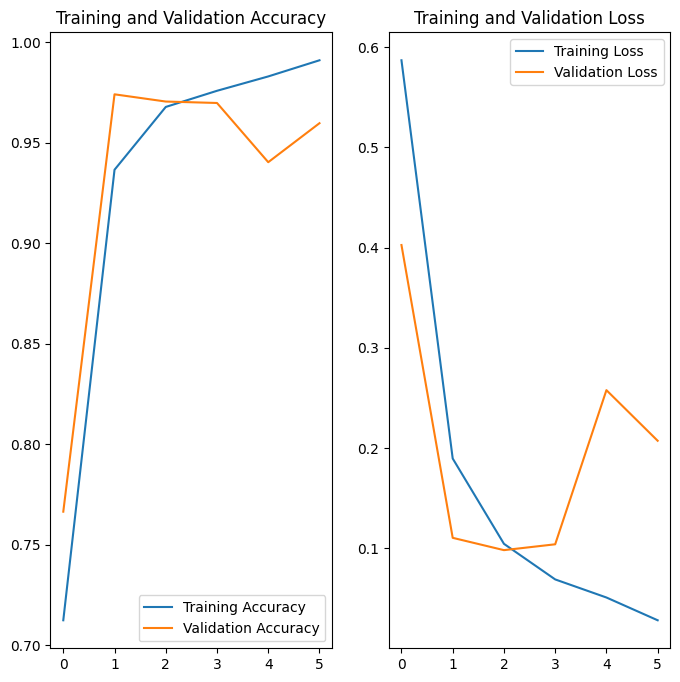

In [82]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(len(history.epoch))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

# Test on new data

In [83]:
X_new = "sale today! to stop texts call 98912460324"

y_new = model.predict([X_new])
prediction = y_new[0][0]
print(f"{prediction}, {'ham' if prediction <= 0.5 else 'spam'}")

1/1 [==============================] - 1s 892ms/step
0.6813605427742004, spam


In [84]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):

    y_new = model.predict([pred_text])
    prediction = y_new[0][0]
    
    return [prediction, 'ham' if prediction <= 0.5 else 'spam']

In [85]:
pred_text = "how are you doing today?"
prediction = predict_message(pred_text)
print(prediction)

pred_text_2 = "sale today! to stop texts call 98912460324"
prediction_2 = predict_message(pred_text_2)
print(prediction_2)

1/1 [==============================] - 0s 305ms/step
[0.018346965, 'ham']
1/1 [==============================] - 0s 263ms/step
[0.68136054, 'spam']


In [86]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()

1/1 [==============================] - 0s 256ms/step
You passed the challenge. Great job!
